## The 0th lesson MLcourse delivered by [HumanomeLab](https://humanome.jp/)
- about Visualizing and Preparing data.
- Please refer to this [Original](https://github.com/HumanomeLab/mlcourse/blob/master/0_data_prep_and_visualization.ipynb).
- This is practice note of above lesson.

In [3]:
import numpy as np
import pandas as pd
import torch
print(torch.cuda.is_available())
data = pd.read_csv("data/yeast_his3.csv")

True


It show head 5 rows which we read

In [4]:
data.head()

,PhotoID,CellID,Cgroup,Agroup,Dgroup,C11-1,C11-2,C101,C103,C104,...,D111,D112,A101,A102,A103,A104,A120,A121,A122,A123
0,2,0,medium,iso,A1,853.0,347.0,1200.0,35.4,29.1,...,NaN,0.293,0.256,0.629,NaN,0.124,118.0,47.3,3.0,0.537
1,2,1,no,B,A,822.0,NaN,822.0,34.4,29.3,...,NaN,NaN,0.127,NaN,NaN,NaN,64.4,26.3,2.0,0.375
2,2,2,large,F,C,791.0,503.0,1290.0,34.1,29.3,...,NaN,0.516,0.165,0.528,0.000242,NaN,119.0,46.8,4.0,0.832
3,2,3,medium,iso,B,731.0,354.0,1090.0,34.0,26.0,...,NaN,0.463,0.266,0.737,NaN,0.181,112.0,46.3,4.0,0.519
4,2,4,medium,iso,C,841.0,388.0,1230.0,34.5,29.6,...,NaN,0.290,0.264,0.914,NaN,0.159,110.0,47.4,3.0,0.415


There are many null data in this dataframe. In this case, to focus on the chief aim we narrow it down to data which have few(or no) null data.

For instance, counting nunmber of null data, there are some null data in almost parameter.

In [5]:
np.sum(data.isnull(), axis=0)

PhotoID      0
CellID       0
Cgroup       0
Agroup       0
Dgroup       0
C11-1        5
C11-2      120
C101         5
C103         5
C104         5
C105       120
C106       120
C108       127
C109       120
C110       120
C111       120
C112       120
C113       120
C114       127
C115         5
C107       120
D105       264
D106       121
D104        86
D107        86
D109       275
D108       121
D110       200
D111       378
D112       121
A101         6
A102       120
A103       335
A104       163
A120         6
A121         6
A122         6
A123         6
dtype: int64

In this lesson, for convenience, pick up parameter have few null data and exclude cells have null data from target of analysing.

In [6]:
columns = ["C101", "C103", "C104","C115","A101","A120","A121","A122","A123"]
# it makes only "Cgroup" and data written in columns
cell_features_pre = data[["Cgroup"] + columns]
# exclude cells have null data
cell_features = cell_features_pre[np.sum(cell_features_pre.isnull(), axis=1) == 0]

Next two cells confirms rows and columns of `cell_features_pre` and `cell_features`

In [7]:
cell_features_pre.shape

(378, 10)

In [8]:
cell_features.shape

(372, 10)

We can recognize 6 rows (cells) data have deleted. Incidentally, deleted data below 6 cells in this table.

In [9]:
cell_features_pre[np.sum(cell_features_pre.isnull(), axis=1) != 0]

,Cgroup,C101,C103,C104,C115,A101,A120,A121,A122,A123
83,complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,no,738.0,33.4,26.5,1.26,NaN,NaN,NaN,NaN,NaN
270,complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


About above table, "Cgroup is complex" accounts for a large percentage.
Let's view distribution of sprout-sizes.

In [10]:
import collections
collections.Counter(np.array(cell_features["Cgroup"]))

Counter({'medium': 88, 'no': 114, 'large': 97, 'small': 73})

Cells labeled "no" have a little more but it seems there isn't a big bias.

In this status, let's visualize relation between conditions of cell walls and sizes of cells.

X-axis: C101(Cell size)

Y-axis: C103(Long axis length of mother cell)

Drawing Scatter plot indicate size of sprout by colors.

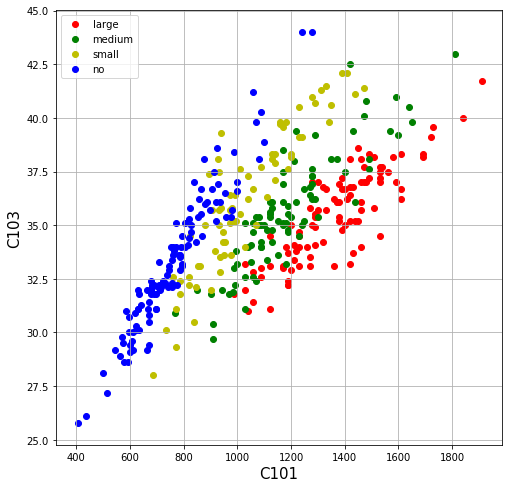

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['large', 'medium', 'small', 'no']
colors = ['r', 'g', 'y', 'b']
xlabel = "C101" # Cell size
ylabel = "C103" # Long axis length of mother cell
ax.set_xlabel(xlabel, fontsize = 15)
ax.set_ylabel(ylabel, fontsize = 15)
for target, color in zip(targets,colors):
    target_row = cell_features['Cgroup'] == target
    ax.scatter( cell_features.loc[target_row, xlabel]
               , cell_features.loc[target_row, ylabel]
               , c = color)
ax.legend(targets)
ax.grid()